<h1 style="text-align: center;">Lab1 Project</h1>
<h1 style="text-align: center;">Coronavirus Analysis</h1>

(This project study about covid, which is one of the most infectious viruses in history)


**Member lists**

| Full Name |MSSV|Tasks|Contribution 
| :------ | :---: | :--------- | :---:
|Lâm Thị Xuân Thy|20127082|Preprocessing continents dataset|100%
|Nguyễn Huy Hoàn|20127166|Preprocessing countries dataset|100%
|Bùi Thanh Lâm|20127402|Question 1: Which countries have had high newcases recently and find the reason.|100%
|Đào Ngọc Hoa|20127500|I. Data Colection, II. Read data and preprocessing|100%
|Võ Thanh Lâm|20127546|Question 2: What are the current trends of covid pandemic among continents?|100%

<a class="anchor" id="1"></a>
## I. Collecting data 

## II. Data Exploration <a class="anchor" id="2"></a>
(*This process is often interleaved with preprocessing*)

**Import libraries**

In [66]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

**Read data**

In [67]:
csv_files = glob.glob("Date*.csv")
csv_files

['Date2023-02-24.csv',
 'Date2023-02-25.csv',
 'Date2023-02-26.csv',
 'Date2023-02-27.csv',
 'Date2023-02-28.csv',
 'Date2023-03-01.csv',
 'Date2023-03-02.csv',
 'Date2023-03-03.csv',
 'Date2023-03-04.csv',
 'Date2023-03-05.csv',
 'Date2023-03-06.csv',
 'Date2023-03-07.csv',
 'Date2023-03-08.csv',
 'Date2023-03-09.csv',
 'Date2023-03-10.csv']

In [68]:
df_list = (pd.read_csv(file) for file in csv_files)

In [69]:
big_df = pd.read_csv('Date2023-02-27.csv')

In [70]:
big_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
0,NaN,\nAsia\n,"214,275,435","+21,169","1,536,461",157.0,"198,909,142","+28,708","13,829,832","15,497",NaN,NaN,NaN,NaN,NaN,Asia,\n,NaN,NaN,NaN,NaN,NaN,2023-02-27
1,NaN,\nNorth America\n,"124,580,169","+16,947","1,611,268",149.0,"119,787,772","+43,175","3,181,129","7,750",NaN,NaN,NaN,NaN,NaN,North America,\n,NaN,NaN,NaN,NaN,NaN,2023-02-27
2,NaN,\nEurope\n,"246,227,059","+55,613","2,016,755",297.0,"241,811,330","+45,101","2,398,974","6,459",NaN,NaN,NaN,NaN,NaN,Europe,\n,NaN,NaN,NaN,NaN,NaN,2023-02-27
3,NaN,\nSouth America\n,"67,991,811","+15,796","1,350,520",92.0,"66,251,241","+38,668","390,050","10,186",NaN,NaN,NaN,NaN,NaN,South America,\n,NaN,NaN,NaN,NaN,NaN,2023-02-27
4,NaN,\nOceania\n,"13,996,291","+1,297","26,116",6.0,"13,834,558","+1,186","135,617",64,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,\n,NaN,NaN,NaN,NaN,NaN,2023-02-27


**The number of rows and columns**

In [71]:
rows, cols = big_df.shape
rows, cols

(247, 23)

In [72]:
# list of columns
big_df.columns


Index(['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/\n1M pop\n', 'Population', 'Continent', '1 Caseevery X ppl',
       '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop',
       'New Deaths/1M pop', 'Active Cases/1M pop', 'Date'],
      dtype='object')

**This corona table has 247 rows and 23 columns**

|Column|Meanings
| :------ | ---
| # | Index
| Date | Date
| Country, Other | Country
| Total Cases | Total cases
| New Cases | New cases
| Total Deaths | Total deaths
| New Deaths | New deaths
| Total Recovered | Total recovered
| Active Cases | Active cases
| Serious, Critical | Serious, critical
| Tot Cases/1M pop | Total cases per 1 million population
| Deaths/1M pop | Deaths per 1 million population
| Total Tests | Total tests
| Tests/1M pop | Tests per 1 million population
| Population | Population
| Continent | Continent
| 1 Caseevery X ppl | 1 case every X people
| 1 Deathevery X ppl | 1 death every X people
| 1 Testevery X ppl | 1 test every X people
| New Cases/1M pop | New cases per 1 million population
| New Deaths/1M pop | New deaths per 1 million population
| Date | Date

In [73]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    231 non-null    float64
 1   Country,Other        247 non-null    object 
 2   TotalCases           247 non-null    object 
 3   NewCases             94 non-null     object 
 4   TotalDeaths          247 non-null    object 
 5   NewDeaths            49 non-null     float64
 6   TotalRecovered       226 non-null    object 
 7   NewRecovered         82 non-null     object 
 8   ActiveCases          228 non-null    object 
 9   Serious,Critical     141 non-null    object 
 10  Tot Cases/1M pop     231 non-null    object 
 11  Deaths/1M pop        225 non-null    object 
 12  TotalTests           213 non-null    object 
 13  Tests/
1M pop
       213 non-null    object 
 14  Population           231 non-null    object 
 15  Continent            243 non-null    obj

*There are some columns having inappropriate data types.*

### Preprocessing

**Convert object to numeric datatypes**

In [74]:
columns = ['TotalCases', 'NewCases', 'TotalDeaths',\
       'TotalRecovered', 'NewRecovered', 'ActiveCases',\
       'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests',\
       'Tests/\n1M pop\n', 'Population', '1 Caseevery X ppl',\
       '1 Deathevery X ppl', 'New Cases/1M pop', 'Active Cases/1M pop']

In [75]:
big_df[columns] = big_df[columns].astype(str).apply(lambda x: pd.to_numeric(x.str.replace('\D','',regex=True)))

In [76]:
big_df.describe()

,#,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
count,231.000000,2.470000e+02,94.000000,2.410000e+02,49.000000,2.260000e+02,82.000000,2.280000e+02,141.000000,231.000000,225.000000,2.130000e+02,2.130000e+02,2.290000e+02,229.000000,223.000000,213.000000,80.000000,34.000000,219.000000
mean,116.000000,1.376245e+07,5971.968085,1.410729e+05,71.938776,1.435566e+07,9592.951220,4.403410e+05,1272.170213,198060.584416,1311.728889,3.259416e+07,2.125101e+06,3.469404e+07,404.218341,14465.672646,10.727700,512.050000,0.820000,28792.305936
std,66.828138,6.851378e+07,18450.358802,6.838457e+05,149.259200,6.866470e+07,26657.871441,2.427947e+06,5352.664904,201127.441547,1453.499687,1.181992e+08,3.626734e+06,1.386374e+08,4147.122732,57220.935490,26.759076,1000.874262,1.214264,92043.329482
min,1.000000,5.000000e+00,1.000000,1.000000e+00,1.000000,2.000000e+00,1.000000,0.000000e+00,0.000000,16.000000,2.000000,7.850000e+03,5.091000e+03,7.990000e+02,1.000000,154.000000,0.000000,1.000000,0.010000,1.000000
25%,58.500000,2.634950e+04,17.500000,2.270000e+02,3.000000,2.345850e+04,25.000000,5.450000e+01,5.000000,17414.500000,175.000000,3.478150e+05,1.899430e+05,4.454310e+05,3.000000,500.000000,0.000000,7.000000,0.200000,58.000000
50%,116.000000,2.509320e+05,124.500000,2.804000e+03,11.000000,3.079295e+05,204.500000,1.253500e+03,18.000000,124608.000000,818.000000,2.226216e+06,8.851190e+05,5.797805e+06,8.000000,1255.000000,1.000000,70.000000,0.400000,554.000000
75%,173.500000,1.950276e+06,1330.000000,1.987000e+04,59.000000,2.380961e+06,2603.750000,1.367650e+04,74.000000,321429.000000,2060.000000,1.302420e+07,2.439107e+06,2.210284e+07,58.000000,5911.000000,5.000000,580.000000,0.700000,3582.500000
max,231.000000,6.798651e+08,112273.000000,6.799716e+06,705.000000,6.526698e+08,157321.000000,2.039560e+07,40503.000000,872204.000000,8723.000000,1.166806e+09,2.330212e+07,1.448471e+09,62616.000000,626161.000000,196.000000,4790.000000,5.000000,611101.000000


**Convert `Date` to datatime type**

In [77]:
big_df['Date'] = pd.to_datetime(big_df['Date']).dt.date

# Countries

In [78]:
countries_df = big_df.dropna(subset=['#'])
countries_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
8,1.0,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,347.0,4.0,1.600000e+08,110461.0,1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-02-27
9,2.0,USA,105276823,6894.0,1145556.0,70.0,102654350.0,33706.0,1476917.0,2586.0,314442.0,3422.0,1.166806e+09,3485028.0,3.348053e+08,North America,3.0,292.0,0.0,210.0,0.2,4411.0,2023-02-27
10,3.0,India,44686371,169.0,530771.0,1.0,44153343.0,140.0,2257.0,NaN,31768.0,377.0,9.185351e+08,653003.0,1.406632e+09,Asia,31.0,2650.0,2.0,1.0,NaN,2.0,2023-02-27
11,4.0,France,39616580,841.0,164929.0,52.0,39383240.0,4999.0,68411.0,869.0,604054.0,2515.0,2.714902e+08,4139547.0,6.558452e+07,Europe,2.0,398.0,0.0,130.0,0.8,1043.0,2023-02-27
12,5.0,Germany,38144033,32970.0,167951.0,139.0,37679400.0,17900.0,296682.0,NaN,454726.0,2002.0,1.223324e+08,1458359.0,8.388360e+07,Europe,2.0,499.0,1.0,3930.0,2.0,3537.0,2023-02-27


**Values distribution of Numeric columns**

In [79]:
df = countries_df.describe().T
df['missing_percentage'] = ((1-df['count']/len(countries_df)) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,231.0,1.160000e+02,6.682814e+01,1.00,58.50,116.0,173.50,2.310000e+02,0.0
TotalCases,231.0,2.943139e+06,9.559476e+06,5.00,24123.00,206633.0,1300452.50,1.052768e+08,0.0
NewCases,80.0,1.403412e+03,4.328637e+03,1.00,11.50,97.0,493.75,3.297000e+04,65.4
TotalDeaths,225.0,3.022096e+04,1.061084e+05,1.00,225.00,2179.0,14452.00,1.145556e+06,2.6
NewDeaths,35.0,2.014286e+01,2.846168e+01,1.00,2.50,6.0,28.00,1.390000e+02,84.8
TotalRecovered,210.0,3.017621e+06,9.614638e+06,2.00,21972.50,235145.5,1467827.75,1.026544e+08,9.1
NewRecovered,68.0,2.313794e+03,6.471323e+03,1.00,15.00,125.0,801.00,3.370600e+04,70.6
ActiveCases,212.0,8.875175e+04,7.959752e+05,0.00,52.25,1041.5,9963.00,1.143434e+07,8.2
"Serious,Critical",125.0,1.389120e+02,7.181380e+02,1.00,4.00,13.0,52.00,7.557000e+03,45.9
Tot Cases/1M pop,229.0,1.956007e+05,1.968600e+05,16.00,17214.00,124608.0,314442.00,7.039590e+05,0.9


**NewCases**

In [80]:
countries_df['NewCases']=countries_df['NewCases'].fillna(0)

/tmp/ipykernel_26623/1145570938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_df['NewCases']=countries_df['NewCases'].fillna(0)


<Axes: xlabel='NewCases', ylabel='Count'>

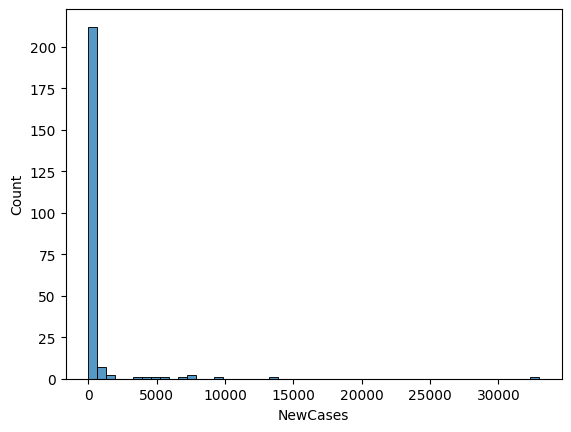

In [81]:
sns.histplot(data=countries_df, x="NewCases",bins=50)

**comment of NewCases**
- The chart show the distribution of new cases in the world. The most new cases are in the range of 0-1000

**TotalDeaths**

In [82]:
df = countries_df.loc[countries_df['TotalDeaths'].isna()]
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
229,222.0,Tuvalu,2805,0.0,NaN,NaN,NaN,NaN,2805.0,NaN,232471.0,NaN,NaN,NaN,12066.0,Australia/Oceania,4.0,NaN,NaN,NaN,NaN,232471.0,2023-02-27
230,223.0,Saint Helena,2166,0.0,NaN,NaN,2.0,NaN,2164.0,NaN,354211.0,NaN,NaN,NaN,6115.0,Africa,3.0,NaN,NaN,NaN,NaN,353884.0,2023-02-27
231,224.0,Falkland Islands,1930,0.0,NaN,NaN,1930.0,NaN,0.0,NaN,545352.0,NaN,8632.0,2439107.0,3539.0,South America,2.0,NaN,0.0,NaN,NaN,NaN,2023-02-27
233,226.0,Niue,788,0.0,NaN,NaN,776.0,10.0,12.0,NaN,485820.0,NaN,NaN,NaN,1622.0,Australia/Oceania,2.0,NaN,NaN,NaN,NaN,7398.0,2023-02-27
235,228.0,Vatican City,29,0.0,NaN,NaN,29.0,NaN,0.0,NaN,36295.0,NaN,NaN,NaN,799.0,Europe,28.0,NaN,NaN,NaN,NaN,NaN,2023-02-27
238,231.0,Tokelau,5,0.0,NaN,NaN,NaN,NaN,5.0,NaN,3628.0,NaN,NaN,NaN,1378.0,Australia/Oceania,276.0,NaN,NaN,NaN,NaN,3628.0,2023-02-27


In [83]:
df['Country,Other'].unique()

array(['Tuvalu', 'Saint Helena', 'Falkland Islands', 'Niue',
       'Vatican City', 'Tokelau'], dtype=object)

It seem that these regions do not report the `TotalDeaths`, that is because these are small islands or city. So for further analysis, we would drop these records.

In [84]:
countries_df = countries_df[countries_df['TotalDeaths'].isna()==False]

**NewDeaths**

In [85]:
countries_df['NewDeaths']=countries_df['NewDeaths'].fillna(0)

<Axes: xlabel='NewDeaths', ylabel='Count'>

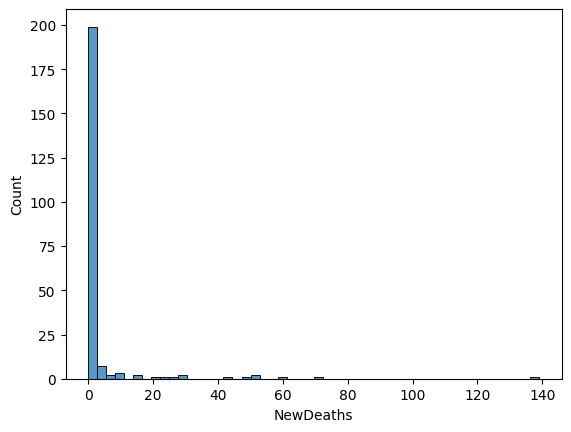

In [86]:
sns.histplot(data=countries_df, x="NewDeaths",bins=50)

**comment of NewDeaths**
- The chart show the distribution of new deaths in the world. The most new deaths are in the range of 0-100

**TotalRecovered**

In [87]:
df = countries_df.loc[countries_df['TotalRecovered'].isna()]
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
19,12.0,Turkey,17042722,0.0,101492.0,0.0,NaN,NaN,NaN,NaN,199186.0,1186.0,162743369.0,1902052.0,85561976.0,Asia,5.0,843.0,1.0,NaN,NaN,1819.0,2023-02-27
74,67.0,Tunisia,1150793,0.0,29330.0,0.0,NaN,NaN,NaN,44.0,95528.0,2435.0,5001397.0,415169.0,12046656.0,Africa,10.0,411.0,2.0,NaN,NaN,951.0,2023-02-27
86,79.0,Paraguay,808327,0.0,19870.0,0.0,NaN,NaN,NaN,7.0,110641.0,2720.0,2657506.0,363751.0,7305843.0,South America,9.0,368.0,3.0,NaN,NaN,12338.0,2023-02-27
102,95.0,Honduras,472116,559.0,11111.0,2.0,NaN,NaN,NaN,105.0,46190.0,1087.0,1633222.0,159787.0,10221247.0,North America,22.0,920.0,6.0,550.0,0.2,32135.0,2023-02-27
119,112.0,Martinique,229807,0.0,1098.0,0.0,NaN,NaN,NaN,12.0,614314.0,2935.0,828928.0,2215870.0,374087.0,North America,2.0,341.0,0.0,NaN,NaN,611101.0,2023-02-27
120,113.0,Laos,218015,0.0,758.0,0.0,NaN,NaN,NaN,NaN,29142.0,101.0,1233207.0,164845.0,7481023.0,Asia,34.0,9869.0,6.0,NaN,NaN,28017.0,2023-02-27
122,115.0,Iceland,208999,0.0,229.0,0.0,NaN,NaN,NaN,2.0,605105.0,663.0,1996384.0,5780036.0,345393.0,Europe,2.0,1508.0,0.0,NaN,NaN,385315.0,2023-02-27
124,117.0,Guadeloupe,201852,0.0,1010.0,0.0,NaN,NaN,NaN,19.0,504890.0,2526.0,938039.0,2346306.0,399794.0,North America,2.0,396.0,0.0,NaN,NaN,496736.0,2023-02-27
144,137.0,Suriname,82227,0.0,1400.0,0.0,NaN,NaN,NaN,NaN,137773.0,2346.0,240907.0,403644.0,596831.0,South America,7.0,426.0,2.0,NaN,NaN,52112.0,2023-02-27
146,139.0,French Polynesia,77957,0.0,649.0,0.0,NaN,NaN,NaN,7.0,274338.0,2284.0,NaN,NaN,284164.0,Australia/Oceania,4.0,438.0,NaN,NaN,NaN,154164.0,2023-02-27


We can fill these null value by this fomula: 

$$TotalRecovered=TotalCases-TotalDeaths-ActiveCases$$

However, these countries do not report ActiveCases too. Fortunately, we know `Active Cases/1M pop`, so we can find `ActiveCases` by this equation: 

$$ActiveCases=Active Cases/1M pop*Population/1000000$$

**ActiveCases**

In [88]:
countries_df.loc[countries_df['TotalRecovered'].isna(), 'ActiveCases']=round(df['Active Cases/1M pop']*df['Population']/1000000,1)
countries_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
8,1.0,China,503302,0.0,5272.0,0.0,379053.0,NaN,118977.0,7557.0,347.0,4.0,1.600000e+08,110461.0,1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-02-27
9,2.0,USA,105276823,6894.0,1145556.0,70.0,102654350.0,33706.0,1476917.0,2586.0,314442.0,3422.0,1.166806e+09,3485028.0,3.348053e+08,North America,3.0,292.0,0.0,210.0,0.2,4411.0,2023-02-27
10,3.0,India,44686371,169.0,530771.0,1.0,44153343.0,140.0,2257.0,NaN,31768.0,377.0,9.185351e+08,653003.0,1.406632e+09,Asia,31.0,2650.0,2.0,1.0,NaN,2.0,2023-02-27
11,4.0,France,39616580,841.0,164929.0,52.0,39383240.0,4999.0,68411.0,869.0,604054.0,2515.0,2.714902e+08,4139547.0,6.558452e+07,Europe,2.0,398.0,0.0,130.0,0.8,1043.0,2023-02-27
12,5.0,Germany,38144033,32970.0,167951.0,139.0,37679400.0,17900.0,296682.0,NaN,454726.0,2002.0,1.223324e+08,1458359.0,8.388360e+07,Europe,2.0,499.0,1.0,3930.0,2.0,3537.0,2023-02-27


In [89]:
df = countries_df.loc[countries_df['TotalRecovered'].isna()]
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
19,12.0,Turkey,17042722,0.0,101492.0,0.0,NaN,NaN,155637.2,NaN,199186.0,1186.0,162743369.0,1902052.0,85561976.0,Asia,5.0,843.0,1.0,NaN,NaN,1819.0,2023-02-27
74,67.0,Tunisia,1150793,0.0,29330.0,0.0,NaN,NaN,11456.4,44.0,95528.0,2435.0,5001397.0,415169.0,12046656.0,Africa,10.0,411.0,2.0,NaN,NaN,951.0,2023-02-27
86,79.0,Paraguay,808327,0.0,19870.0,0.0,NaN,NaN,90139.5,7.0,110641.0,2720.0,2657506.0,363751.0,7305843.0,South America,9.0,368.0,3.0,NaN,NaN,12338.0,2023-02-27
102,95.0,Honduras,472116,559.0,11111.0,2.0,NaN,NaN,328459.8,105.0,46190.0,1087.0,1633222.0,159787.0,10221247.0,North America,22.0,920.0,6.0,550.0,0.2,32135.0,2023-02-27
119,112.0,Martinique,229807,0.0,1098.0,0.0,NaN,NaN,228604.9,12.0,614314.0,2935.0,828928.0,2215870.0,374087.0,North America,2.0,341.0,0.0,NaN,NaN,611101.0,2023-02-27
120,113.0,Laos,218015,0.0,758.0,0.0,NaN,NaN,209595.8,NaN,29142.0,101.0,1233207.0,164845.0,7481023.0,Asia,34.0,9869.0,6.0,NaN,NaN,28017.0,2023-02-27
122,115.0,Iceland,208999,0.0,229.0,0.0,NaN,NaN,133085.1,2.0,605105.0,663.0,1996384.0,5780036.0,345393.0,Europe,2.0,1508.0,0.0,NaN,NaN,385315.0,2023-02-27
124,117.0,Guadeloupe,201852,0.0,1010.0,0.0,NaN,NaN,198592.1,19.0,504890.0,2526.0,938039.0,2346306.0,399794.0,North America,2.0,396.0,0.0,NaN,NaN,496736.0,2023-02-27
144,137.0,Suriname,82227,0.0,1400.0,0.0,NaN,NaN,31102.1,NaN,137773.0,2346.0,240907.0,403644.0,596831.0,South America,7.0,426.0,2.0,NaN,NaN,52112.0,2023-02-27
146,139.0,French Polynesia,77957,0.0,649.0,0.0,NaN,NaN,43807.9,7.0,274338.0,2284.0,NaN,NaN,284164.0,Australia/Oceania,4.0,438.0,NaN,NaN,NaN,154164.0,2023-02-27


In [90]:
countries_df.loc[countries_df['TotalRecovered'].isna(), 'TotalRecovered']=df['TotalCases']-df['TotalDeaths']-df['ActiveCases']

<Axes: xlabel='ActiveCases', ylabel='Count'>

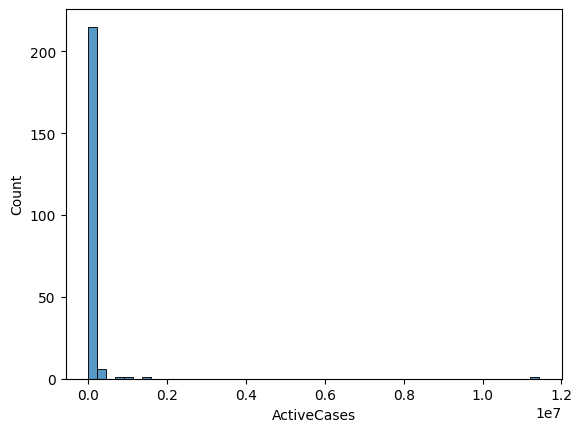

In [91]:
sns.histplot(data=countries_df, x="ActiveCases",bins=50)

**comment of ActiveCases**
- The chart show the distribution of active cases in the world. The most active cases are in the range of 0-100000

**NewRecovered**

In [92]:
countries_df['NewRecovered']=countries_df['NewRecovered'].fillna(0)

<Axes: xlabel='NewRecovered', ylabel='Count'>

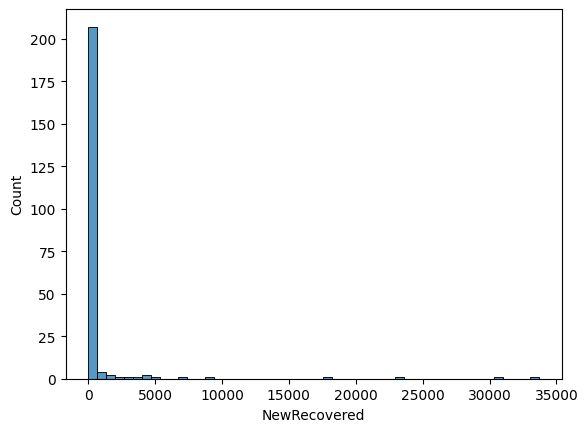

In [93]:
sns.histplot(data=countries_df, x="NewRecovered",bins=50)

**comment of NewRecovered**
- The chart show the distribution of new recovered in the world. The most new recovered are in the range of 0-1000

**Serious,Critical**

In [94]:
countries_df['Serious,Critical']=countries_df['Serious,Critical'].fillna(0)

<Axes: xlabel='Serious,Critical', ylabel='Count'>

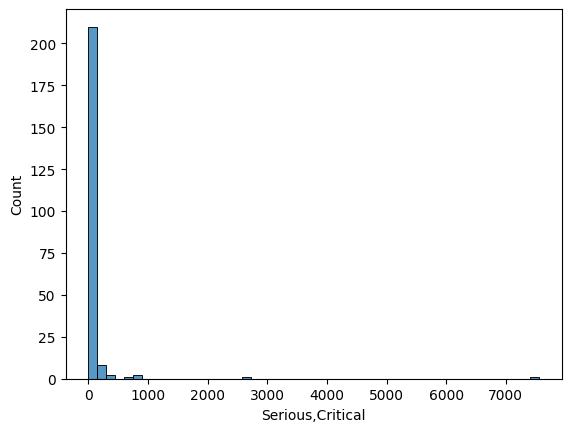

In [95]:
sns.histplot(data=countries_df, x="Serious,Critical",bins=50)

**comment of Serious,Critical**
- The chart show the distribution of serious, critical in the world. The most serious, critical are in the range of 0-1000

**TotalTests**

In [96]:
df = countries_df.loc[countries_df['TotalTests'].isna()]
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
38,31.0,DPRK,4772813,0.0,74.0,0.0,4772739.0,0.0,0.0,0.0,183636.0,3.0,NaN,NaN,25990679.0,Asia,5.0,351225.0,NaN,NaN,NaN,NaN,2023-02-27
146,139.0,French Polynesia,77957,0.0,649.0,0.0,33500.1,0.0,43807.9,7.0,274338.0,2284.0,NaN,NaN,284164.0,Australia/Oceania,4.0,438.0,NaN,NaN,NaN,154164.0,2023-02-27
158,151.0,Seychelles,50665,0.0,172.0,0.0,50440.0,0.0,53.0,0.0,509575.0,1730.0,NaN,NaN,99426.0,Africa,2.0,578.0,NaN,NaN,NaN,533.0,2023-02-27
164,157.0,Tanzania,42823,0.0,846.0,0.0,200.0,0.0,41777.0,7.0,677.0,13.0,NaN,NaN,63298550.0,Africa,1478.0,74821.0,NaN,NaN,NaN,660.0,2023-02-27
180,173.0,Solomon Islands,24575,0.0,153.0,0.0,16357.3,0.0,8064.7,1.0,34077.0,212.0,NaN,NaN,721159.0,Australia/Oceania,29.0,4713.0,NaN,NaN,NaN,11183.0,2023-02-27
189,182.0,Nicaragua,18491,0.0,225.0,0.0,4225.0,0.0,14041.0,0.0,2728.0,33.0,NaN,NaN,6779100.0,North America,367.0,30129.0,NaN,NaN,NaN,2071.0,2023-02-27
191,184.0,Tajikistan,17786,0.0,125.0,0.0,17264.0,0.0,397.0,0.0,1786.0,13.0,NaN,NaN,9957464.0,Asia,560.0,79660.0,NaN,NaN,NaN,40.0,2023-02-27
198,191.0,Marshall Islands,15598,0.0,17.0,0.0,15528.0,0.0,53.0,0.0,259720.0,283.0,NaN,NaN,60057.0,Australia/Oceania,4.0,3533.0,NaN,NaN,NaN,882.0,2023-02-27
211,204.0,Comoros,8998,0.0,161.0,0.0,8837.0,0.0,0.0,0.0,9916.0,177.0,NaN,NaN,907419.0,Africa,101.0,5636.0,NaN,NaN,NaN,NaN,2023-02-27
224,217.0,Kiribati,5013,0.0,18.0,0.0,2703.0,0.0,2292.0,3.0,40618.0,146.0,NaN,NaN,123419.0,Australia/Oceania,25.0,6857.0,NaN,NaN,NaN,18571.0,2023-02-27


It is easy to recognize that all of countries are isolated due to polital conditions, war, poverty or isolation. For instance, `Diamond Princess` and `MS Zaandam` are luxury cruise ships, which had experienced a big virus transmission at the early stage of the Covid-19 pandemic. For further analysis, we would drop these records.

In [97]:
countries_df = countries_df[countries_df['TotalTests'].isna()==False]

**Population**

<Axes: xlabel='Population', ylabel='Count'>

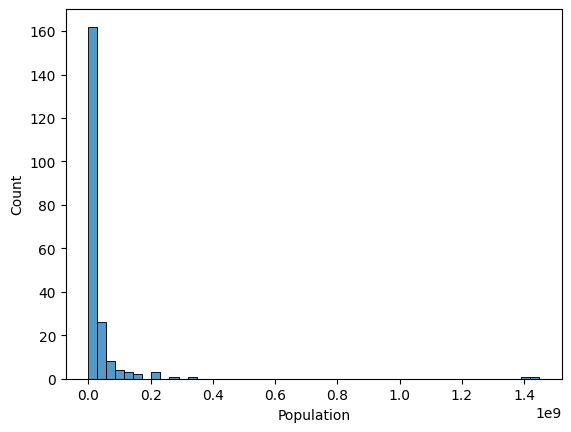

In [98]:
sns.histplot(data=countries_df, x="Population",bins=50)

**comment of Population**
- The chart show the distribution of population in the world. The most population are in the range of 0-100000000

**New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop**

In [99]:
columns = ['New Cases/1M pop','New Deaths/1M pop','Active Cases/1M pop']

In [100]:
countries_df[columns]=countries_df[columns].fillna(0)

<Axes: xlabel='New Cases/1M pop', ylabel='Count'>

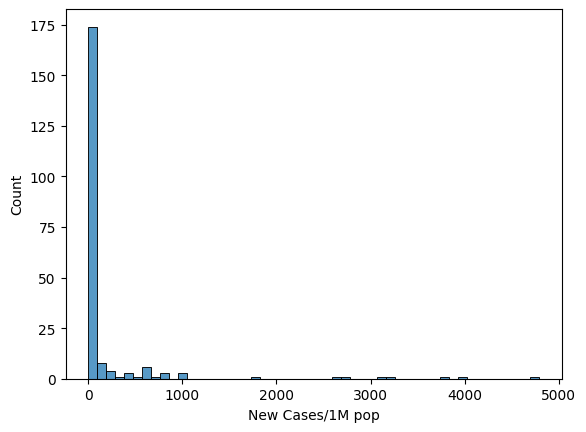

In [101]:
sns.histplot(data=countries_df, x="New Cases/1M pop",bins=50)

**comment of New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop**
- The chart show the distribution of new cases/1M pop, new deaths/1M pop, active cases/1M pop in the world. The most new cases/1M pop, new deaths/1M pop, active cases/1M pop are in the range of 0-1000

<Axes: xlabel='New Deaths/1M pop', ylabel='Count'>

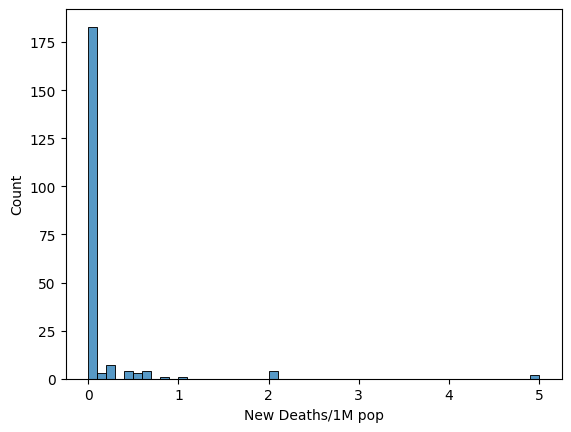

In [102]:
sns.histplot(data=countries_df, x="New Deaths/1M pop",bins=50)

**1 Caseevery X ppl, 1 Deathevery X ppl, 1 Testevery X ppl**
- The chart show the distribution of 1 case every X ppl, 1 death every X ppl, 1 test every X ppl in the world. The most 1 case every X ppl, 1 death every X ppl, 1 test every X ppl are in the range of 0-1000

<Axes: xlabel='Active Cases/1M pop', ylabel='Count'>

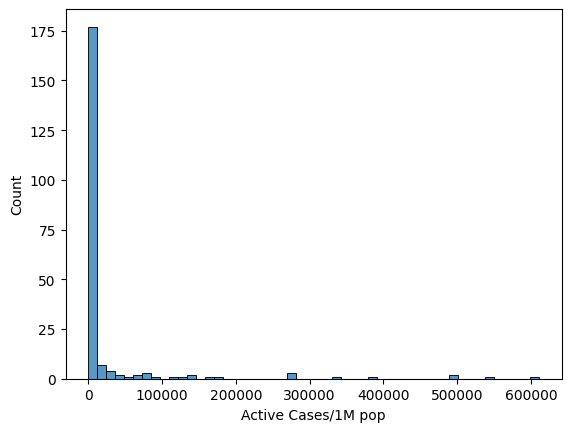

In [103]:
sns.histplot(data=countries_df, x="Active Cases/1M pop",bins=50)

It is awesome that there are no missing value now.

In [104]:
df = countries_df.describe().T
df['missing_percentage'] = ((1-df['count']/len(countries_df)) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,212.0,1.090896e+02,6.385311e+01,1.0,54.75,107.5,163.25,2.250000e+02,0.0
TotalCases,212.0,3.183122e+06,9.940184e+06,1403.0,36815.75,269016.5,1466371.50,1.052768e+08,0.0
NewCases,212.0,5.295896e+02,2.735008e+03,0.0,0.00,0.0,26.00,3.297000e+04,0.0
TotalDeaths,212.0,3.206255e+04,1.090582e+05,1.0,294.75,2869.0,16863.75,1.145556e+06,0.0
NewDeaths,212.0,3.325472e+00,1.366466e+01,0.0,0.00,0.0,0.00,1.390000e+02,0.0
TotalRecovered,212.0,3.055399e+06,9.616853e+06,104.1,25486.50,242543.5,1457077.25,1.026544e+08,0.0
NewRecovered,212.0,7.421132e+02,3.803914e+03,0.0,0.00,0.0,13.25,3.370600e+04,0.0
ActiveCases,212.0,9.566522e+04,7.960550e+05,0.0,83.75,1737.0,13676.50,1.143434e+07,0.0
"Serious,Critical",212.0,8.182075e+01,5.547821e+02,0.0,0.00,2.0,20.00,7.557000e+03,0.0
Tot Cases/1M pop,212.0,1.972533e+05,1.970801e+05,347.0,18548.75,128888.5,317935.50,7.039590e+05,0.0


**Values distribution of Catergorial columns**

In [105]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = countries_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(countries_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,"Country,Other",Continent,Date
missing_percentage,0.0,0.0,0.0
num_values,212,6,1
value_percentages,"{'China': 0.5, 'Malawi': 0.5, 'Suriname': 0.5, 'New Caledonia': 0.5, 'Eswatini': 0.5, 'Guyana': ...","{'Africa': 25.0, 'Asia': 22.6, 'Europe': 22.2, 'North America': 17.9, 'South America': 6.1, 'Aus...",{2023-02-27: 100.0}


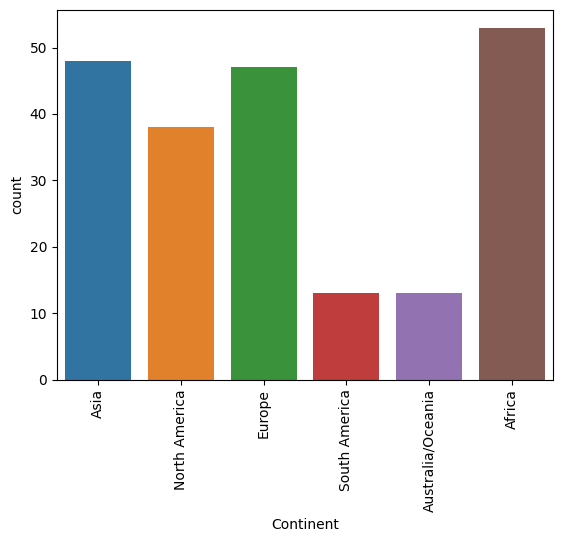

In [106]:
plt.xticks(rotation=90)
sns.countplot(x=countries_df['Continent'])
plt.show()

**conclusion of values distribution of Catergorial columns in countries**
- The chart show the distribution of catergorial columns in countries. The most catergorial columns are in the range of 0-1000


# Continents

In [107]:
continents_df = big_df[(big_df['#'].isna())&((big_df['Country,Other']!='Total:')\
                                             &(big_df['Country,Other']!='\n\n'))&(big_df['Continent']!='All')]
continents_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
0,NaN,\nAsia\n,214275435,21169.0,1536461.0,157.0,198909142.0,28708.0,13829832.0,15497.0,NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-27
1,NaN,\nNorth America\n,124580169,16947.0,1611268.0,149.0,119787772.0,43175.0,3181129.0,7750.0,NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-27
2,NaN,\nEurope\n,246227059,55613.0,2016755.0,297.0,241811330.0,45101.0,2398974.0,6459.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-27
3,NaN,\nSouth America\n,67991811,15796.0,1350520.0,92.0,66251241.0,38668.0,390050.0,10186.0,NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-27
4,NaN,\nOceania\n,13996291,1297.0,26116.0,6.0,13834558.0,1186.0,135617.0,64.0,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-27


**Values distribution of Numeric columns**

In [108]:
df = continents_df.describe().T
df['missing_percentage'] = ((1-df['count']/len(continents_df)) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
TotalCases,6.0,1.133107e+08,1.000085e+08,12793643.0,27495171.00,96285990.0,1.918516e+08,246227059.0,0.0
NewCases,6.0,1.871217e+04,1.990258e+04,1297.0,5037.25,16371.5,2.011350e+04,55613.0,0.0
TotalDeaths,6.0,1.133284e+06,8.012065e+05,26116.0,531565.75,1443490.5,1.592566e+06,2016755.0,0.0
NewDeaths,6.0,1.175000e+02,1.102157e+02,4.0,27.50,120.5,1.550000e+02,297.0,0.0
TotalRecovered,6.0,1.087782e+08,9.603848e+07,12075067.0,26938728.75,93019506.5,1.791288e+08,241811330.0,0.0
NewRecovered,6.0,2.622017e+04,2.046559e+04,483.0,8066.50,33688.0,4.204825e+04,45101.0,0.0
ActiveCases,6.0,3.399266e+06,5.257204e+06,135617.0,407536.25,1429484.5,2.985590e+06,13829832.0,0.0
"Serious,Critical",6.0,6.750500e+03,5.875042e+03,64.0,2025.00,7104.5,9.577000e+03,15497.0,0.0
Tot Cases/1M pop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


**Drop unrelevant or null columns**

In [109]:
cols = ['#','Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests','Country,Other',\
       'Tests/\n1M pop\n', 'Population', '1 Caseevery X ppl','1 Testevery X ppl',\
       '1 Deathevery X ppl', 'New Cases/1M pop', 'Active Cases/1M pop','New Deaths/1M pop','Date']
# drop unrelevant columns
continents_df =continents_df.drop(columns=cols,axis=1)
continents_df

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Continent
0,214275435,21169.0,1536461.0,157.0,198909142.0,28708.0,13829832.0,15497.0,Asia
1,124580169,16947.0,1611268.0,149.0,119787772.0,43175.0,3181129.0,7750.0,North America
2,246227059,55613.0,2016755.0,297.0,241811330.0,45101.0,2398974.0,6459.0,Europe
3,67991811,15796.0,1350520.0,92.0,66251241.0,38668.0,390050.0,10186.0,South America
4,13996291,1297.0,26116.0,6.0,13834558.0,1186.0,135617.0,64.0,Australia/Oceania
5,12793643,1451.0,258581.0,4.0,12075067.0,483.0,459995.0,547.0,Africa


**TotalTests**

In [110]:
df=countries_df.groupby(['Continent']).TotalTests.sum().reset_index()
continents_df = continents_df.merge(df,on='Continent',how='left')

**Values distribution of Catergorial columns**

In [111]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = continents_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(continents_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,Continent
missing_percentage,0.0
num_values,6
value_percentages,"{'Asia': 16.7, 'North America': 16.7, 'Europe': 16.7, 'South America': 16.7, 'Australia/Oceania'..."


<a class="anchor" id="3.1"></a>
# Question 1: <center>Which attributes contribute to the newcases among countries?</center> 
**Introduction:**
The background (academics environment and current situation) can influence either positively or negatively a person’s mental well-being. These factors can be current year of study, marial status, age, ...  In this project, we would like to study the relationship between students' background and their mental health issues. Finding this connection would help schools give useful advices for students as well as prepare mental health support for students.

**Step summary:**
1. [Year analysis](#3.1.1)
2. [CGPA analysis](#3.1.2)
3. [Age analysis](#3.1.3)
4. [Major analysis](#3.1.4)
5. [Marital Status Analysis](#3.1.5)
6. [Modeling](#3.1.6)
7. [Conclusion](#3.1.7)

<a class="anchor" id="3.2"></a>
# Question 2. <center>What is the different picture of covid pandemic between continents?</center> 

**Introduction**
As we think, a student would find the support from specialists when they have any symtoms of `anxiety`,`depression`,`panic attack`. However, this fact raise the question that whether they would have as we think in the real world? Therefore, we would find the answer for this question and from this, we can give useful advices for students to care more about their mental health.

**Step summary:**
1. **General situation analysis ('TotalCases','TotalRecovered','TotalTests','TotalDeaths')**
2. **Background analysis (Population)**
3. **Current situation analysis ('NewCases','NewDeaths','NewRecovered','Serious,Critical')**
4. **Activecase analysis**
4. **Conclusion**

### General situation analysis

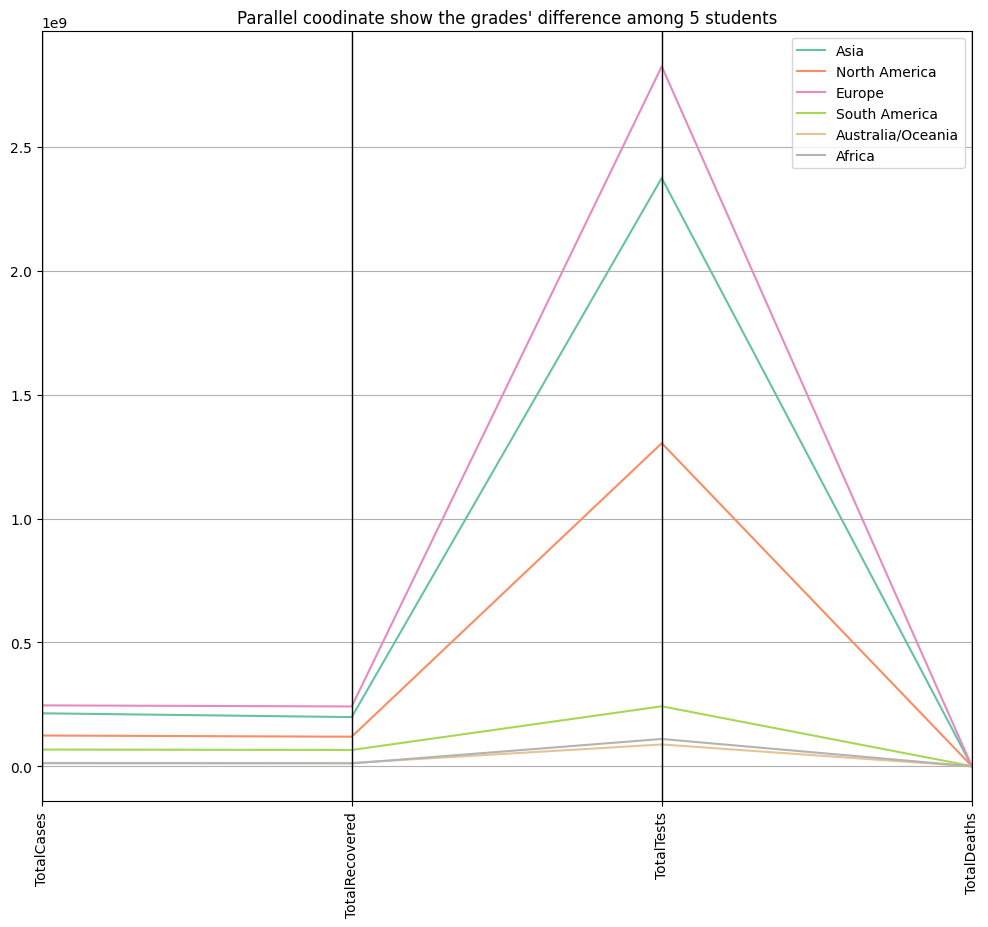

In [112]:
df = continents_df[['Continent','TotalCases','TotalRecovered','TotalTests','TotalDeaths']]

plt.figure(figsize=(12, 10))
parallel_coordinates(df,'Continent', colormap=plt.get_cmap("Set2"))
plt.title('Parallel coodinate show the grades\' difference among 5 students')
plt.xticks(rotation=90)
plt.show()

**Comment**
- The chart show the distribution of total cases, total recovered, total tests, total deaths in the world. The most total cases, total recovered, total tests, total deaths are in the range of 0-10000000

**TotalCases**

In [113]:
df = countries_df.groupby('Continent').TotalCases.sum()
df

Continent
Africa                12688981
Asia                 209484836
Australia/Oceania     13869550
Europe               246227030
North America        124561678
South America         67989881
Name: TotalCases, dtype: int64

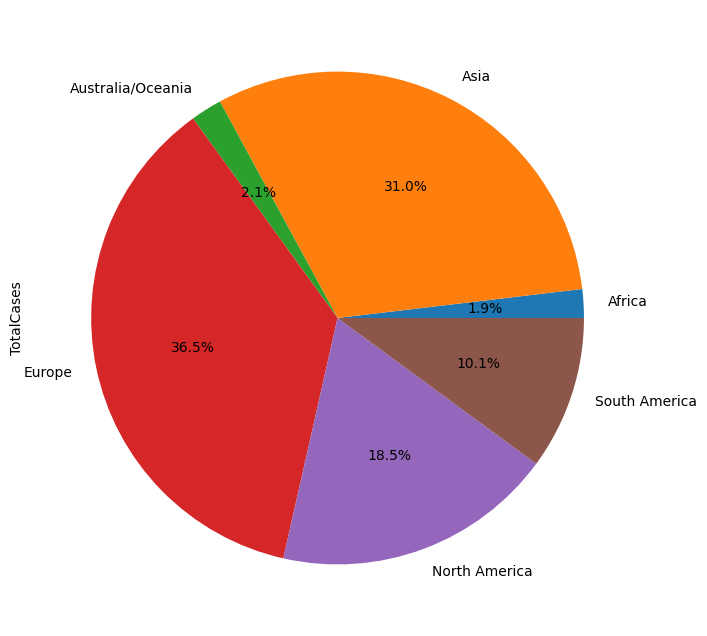

In [114]:
plt.figure(figsize=(10, 8))
df.plot.pie(autopct="%.1f%%");

**comment of TotalCases**
- The chart show the distribution of total cases in the world. The most total cases are in the range of 0-10000000
- In Europe, the total cases are the most, which is 2.5 times of the second one.
- In Asia, the total cases are the second, which is 1.5 times of the third one.
- In Africa, the total cases are the third.

**TotalDeaths**

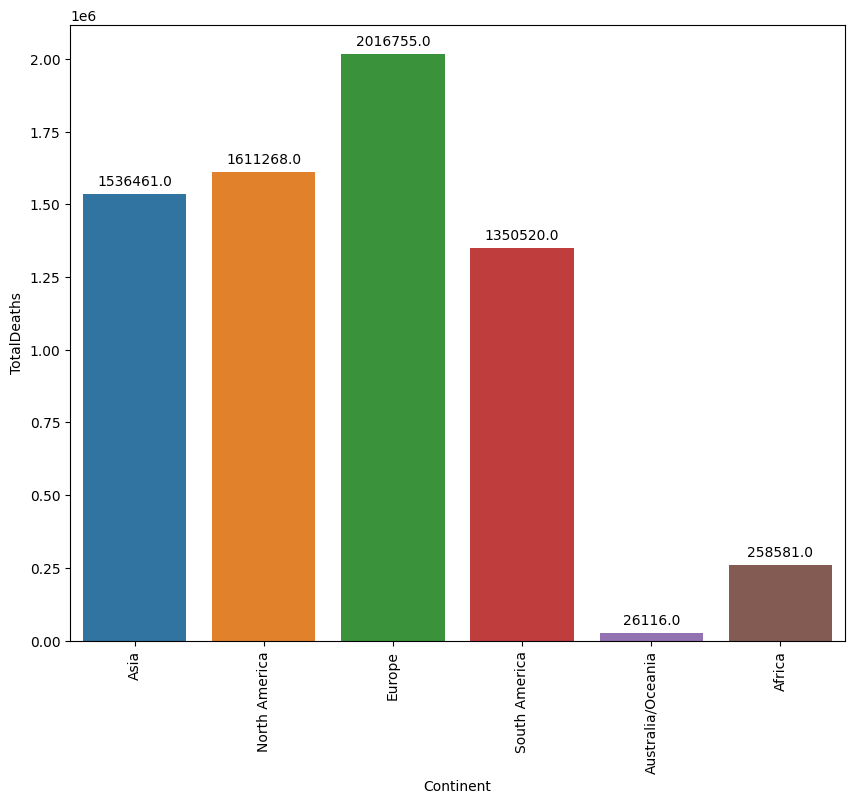

In [115]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='TotalDeaths', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


**comment of TotalDeaths**
- The chart show the distribution of total deaths in the world. The most total deaths are in the range of 0-100000
- In Europe, the total deaths are the most, which is 2.5 times of the second one.
- In Asia, the total deaths are the second, which is 1.5 times of the third one.
- In Africa, the total deaths are the third.


**NewDeaths**

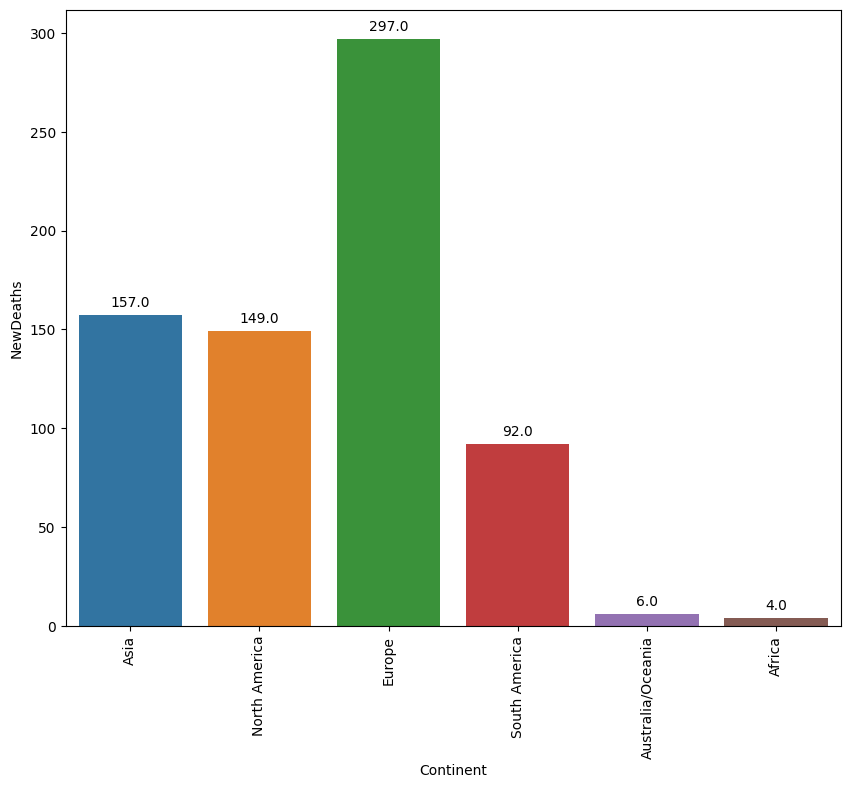

In [116]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='NewDeaths', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


**comment of NewDeaths**
- The chart show the distribution of new deaths in the world. The most new deaths are in the range of 0-100
- In Europe, the new deaths are the most, which is 2.5 times of the second one, Asia.
- In Asia, the new deaths are the second, which is 1.5 times of the third one, North America.
- In North America, the new deaths are the third


**TotalRecovered**

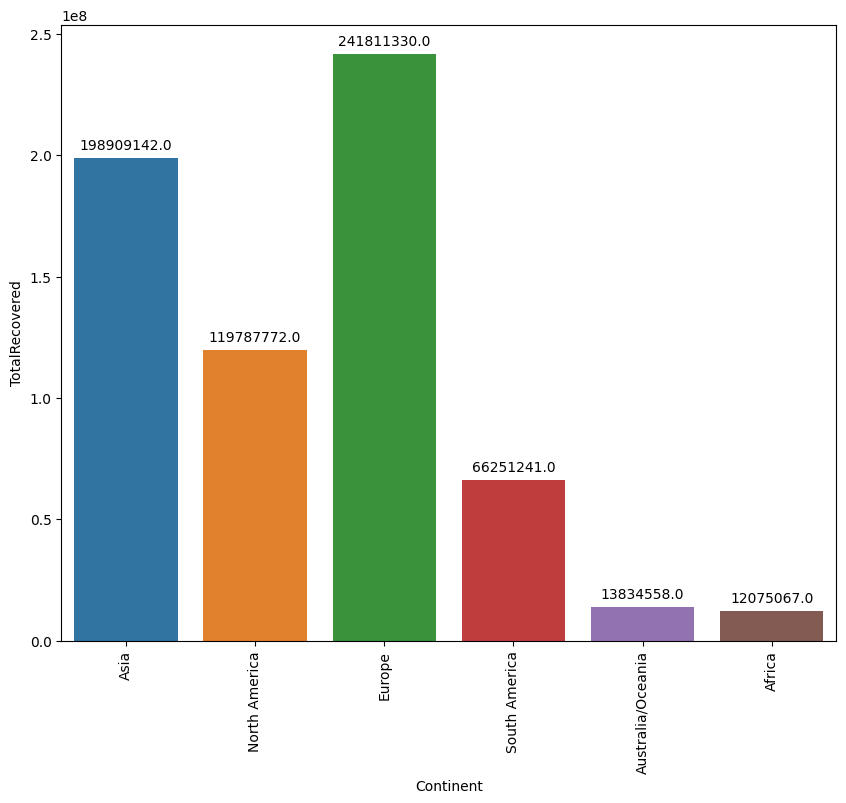

In [117]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='TotalRecovered', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


**comment of TotalRecovered**
- The chart show the distribution of total recovered in the world. The most total recovered are in the range of 0-1000000
- In Europe, the total recovered are the most, which is 2.5 times of the second one, Asia.
- In Asia, the total recovered are the second, which is 1.5 times of the third one, North America.
- In North America, the total recovered are the third


**NewRecovered**

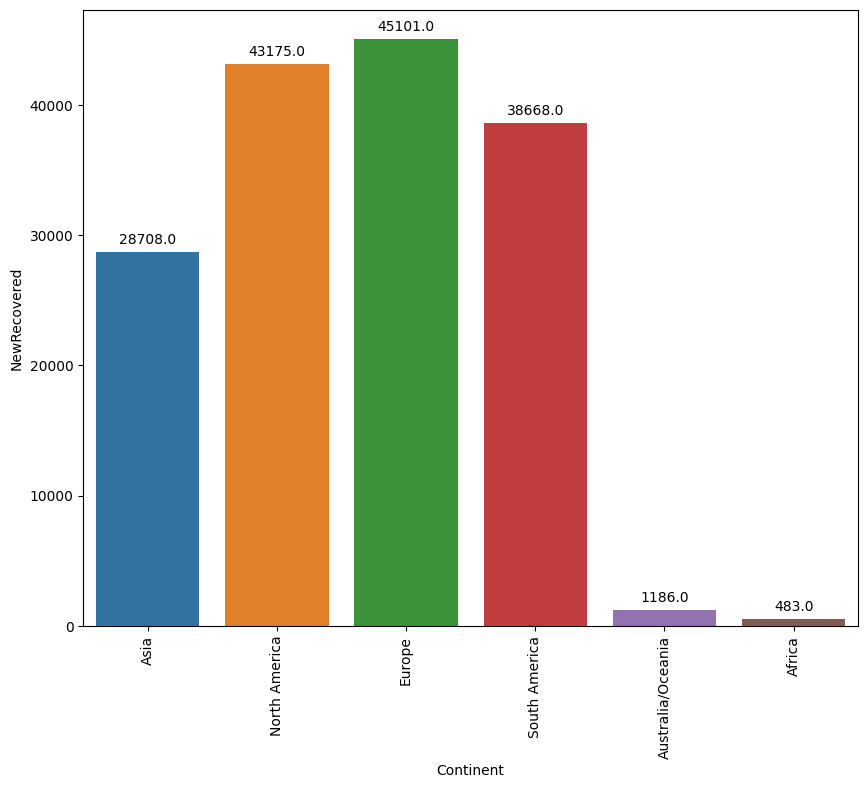

In [118]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='NewRecovered', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


**comment of NewRecovered**
- The chart show the distribution of new recovered in the world. The most new recovered are in the range of 0-1000
- In Europe, the new recovered are the most, which is 2.5 times of the second one.
- In North America, the new recovered are the second, which is 1.5 times of the third one.
- In South America, the new recovered are the third.

**ActiveCases**

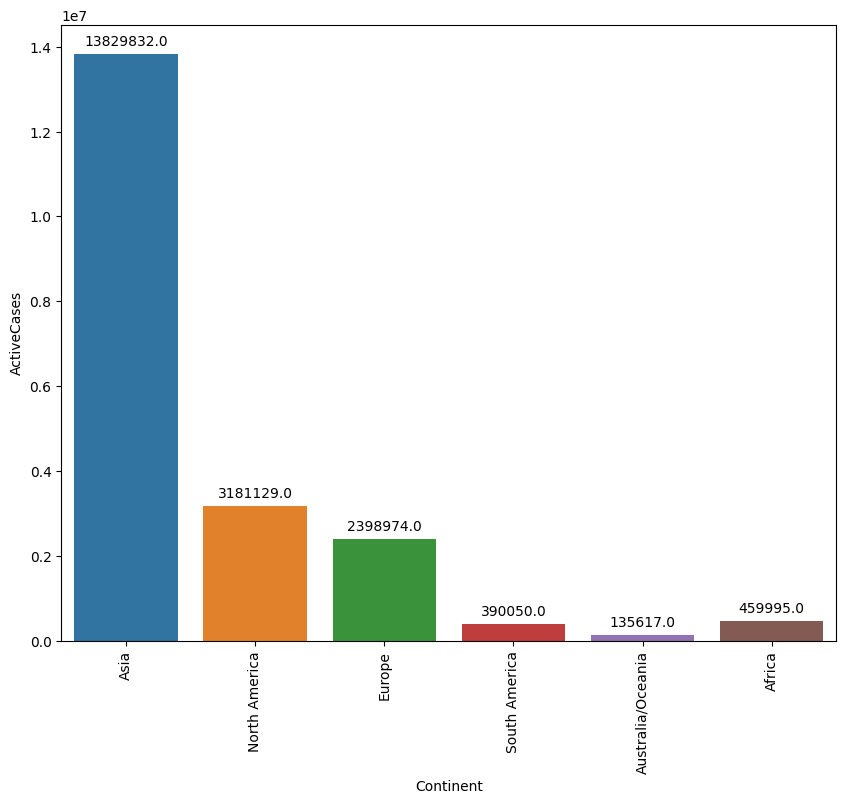

In [119]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='ActiveCases', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


**comment of ActiveCases**
- The chart show the distribution of active cases in the world. The most active cases are in the range of 0-1000000
- In Asia, the active cases are the most, which is many times of the second one.
- In North America, the active cases are the second, which is 1.5 times of the third one.
- In Europre, the active cases are the third.


**Serious,Critical**

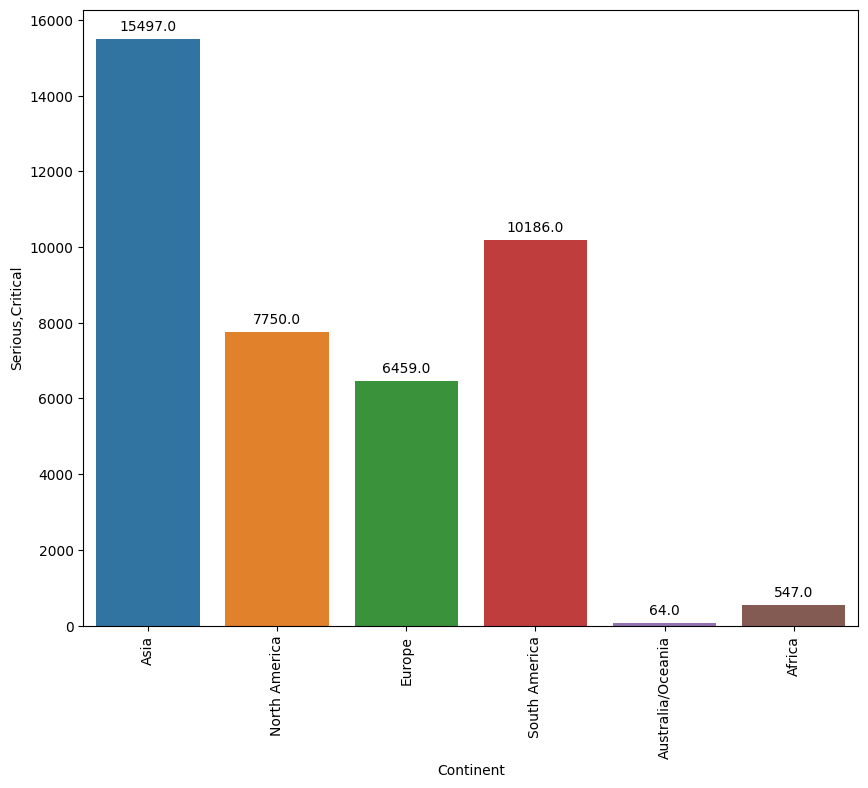

In [120]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='Serious,Critical', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


**comment of Serious,Critical**
- The chart show the distribution of serious, critical in the world. The most serious, critical are in the range of 0-100000


**Population**

In [121]:
countries_df = big_df.dropna(subset=['#'])
countries_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
8,1.0,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,347.0,4.0,1.600000e+08,110461.0,1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-02-27
9,2.0,USA,105276823,6894.0,1145556.0,70.0,102654350.0,33706.0,1476917.0,2586.0,314442.0,3422.0,1.166806e+09,3485028.0,3.348053e+08,North America,3.0,292.0,0.0,210.0,0.2,4411.0,2023-02-27
10,3.0,India,44686371,169.0,530771.0,1.0,44153343.0,140.0,2257.0,NaN,31768.0,377.0,9.185351e+08,653003.0,1.406632e+09,Asia,31.0,2650.0,2.0,1.0,NaN,2.0,2023-02-27
11,4.0,France,39616580,841.0,164929.0,52.0,39383240.0,4999.0,68411.0,869.0,604054.0,2515.0,2.714902e+08,4139547.0,6.558452e+07,Europe,2.0,398.0,0.0,130.0,0.8,1043.0,2023-02-27
12,5.0,Germany,38144033,32970.0,167951.0,139.0,37679400.0,17900.0,296682.0,NaN,454726.0,2002.0,1.223324e+08,1458359.0,8.388360e+07,Europe,2.0,499.0,1.0,3930.0,2.0,3537.0,2023-02-27


In [122]:
df=countries_df.groupby(['Continent']).Population.sum().reset_index()
df

,Continent,Population
0,Africa,1.406729e+09
1,Asia,4.711357e+09
2,Australia/Oceania,4.347041e+07
3,Europe,7.475438e+08
4,North America,5.981409e+08
5,South America,4.376944e+08


In [123]:
continents_df = continents_df.merge(df,on='Continent',how='left')

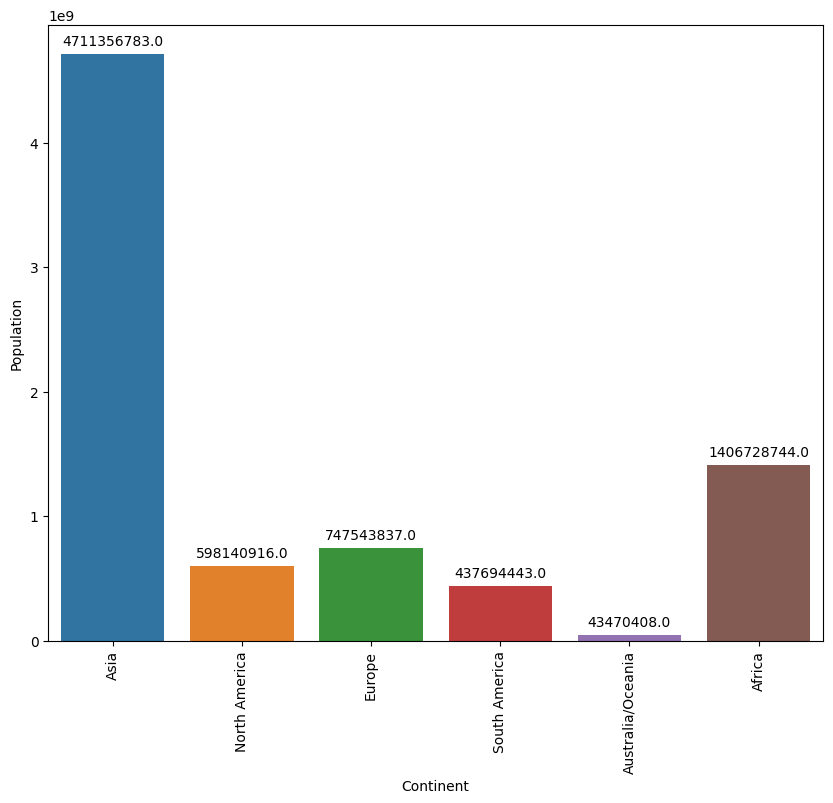

In [124]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='Population', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


**comment of Population**
- The chart show the distribution of population in the world. The most population are in the range of 0-100000000

**TotalTests**

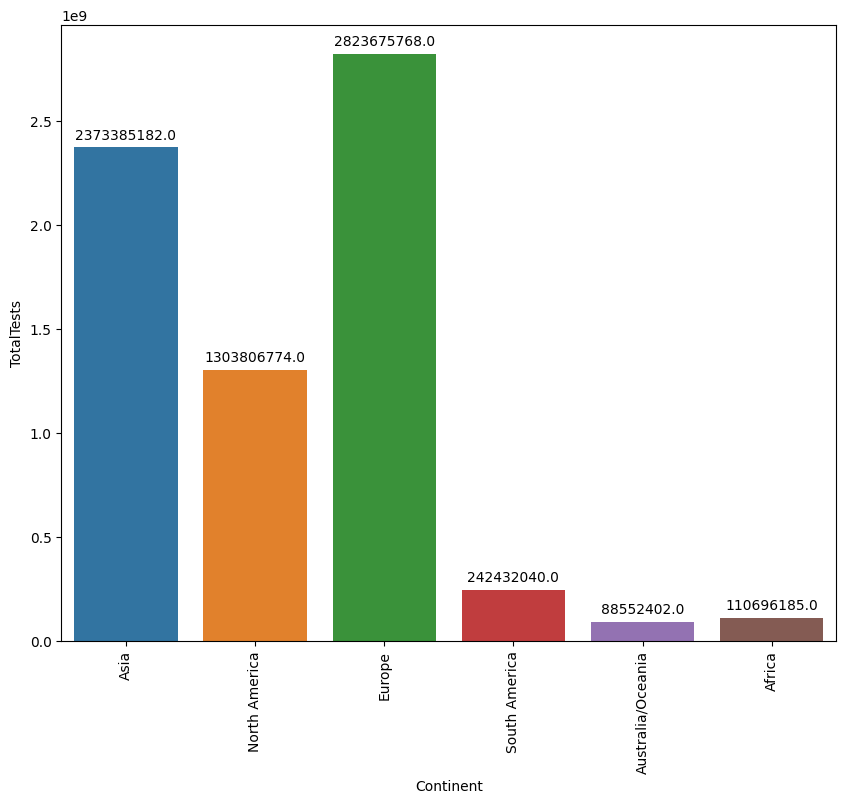

In [125]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='TotalTests', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


**comment of TotalTests**
- The chart show the distribution of total tests in the world. The most total tests are in the range of 0-100000000

**Current situation analysis**

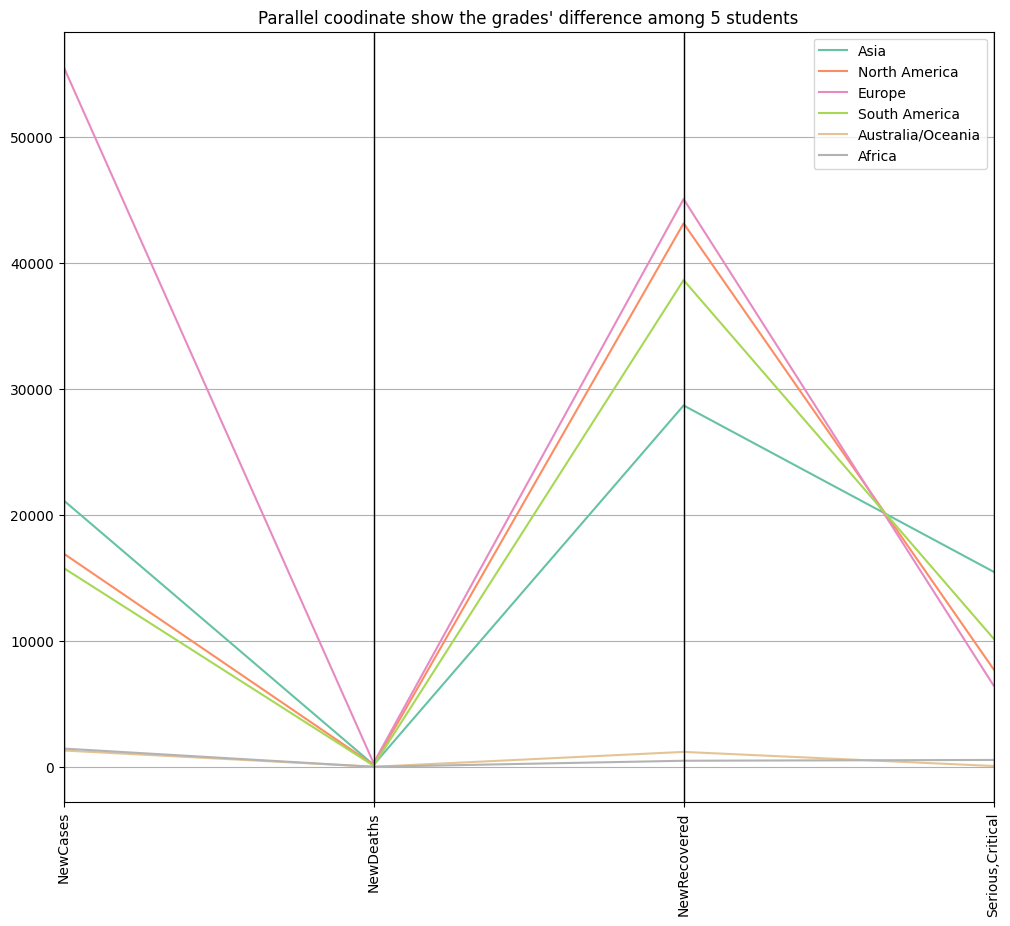

In [126]:
df = continents_df[['Continent','NewCases','NewDeaths','NewRecovered','Serious,Critical']]
plt.figure(figsize=(12, 10))
parallel_coordinates(df,'Continent', colormap=plt.get_cmap("Set2"))
plt.title('Parallel coodinate show the grades\' difference among 5 students')
plt.xticks(rotation=90)
plt.show()

**comment of New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop**
- The chart show the distribution of new cases/1M pop, new deaths/1M pop, active cases/1M pop in the world. The most new cases/1M pop, new deaths/1M pop, active cases/1M pop are in the range of 0-1000

**NewCases**

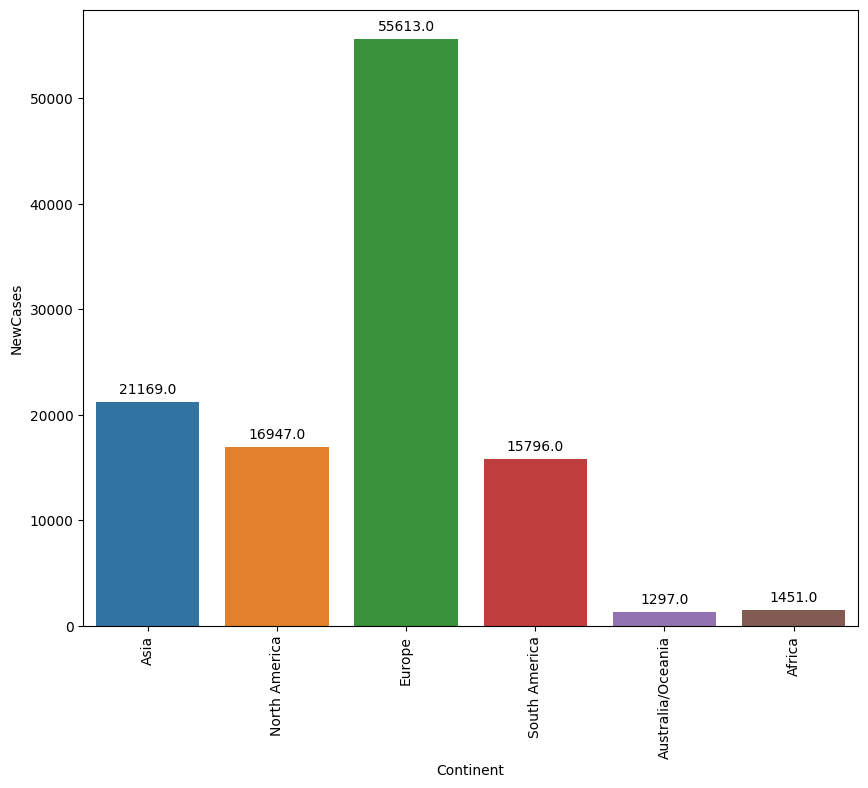

In [127]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='NewCases', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


**comment of NewCases**
- The chart show the distribution of new cases in the world. The most new cases are in the range of 0-10000